<h2>Google Gemini - Image</h2>
<h5><a href="https://ai.google.dev/">Google AI for Developers</a> 

In [2]:
# API KEY using os.environ
'''
import os

llm_key = 'GOOGLE_API_KEY' # OPENAI_API_KEY
os.environ[llm_key] = '##' 
api_key = os.environ[llm_key]
'''

"\nimport os\n\nllm_key = 'GOOGLE_API_KEY' # OPENAI_API_KEY\nos.environ[llm_key] = '##' \napi_key = os.environ[llm_key]\n"

In [3]:
# Read API KEY from file
import json

file_path = 'llms_vault.json'
llm_key = 'GOOGLE_API_KEY'

try:
    with open(file_path,'r') as f:
        api_key = json.loads(f.read()).get(llm_key)
        if not api_key:
            raise ValueError(f"Some issue with '{llm_key}' from '{file_path}'. Verify the key:'{llm_key}' if it exists!")
except FileNotFoundError:
    raise FileNotFoundError(f"File related issue encountered, verify file path and name '{file_path}'")

<h3>Using Gemini API</h3>

In [4]:
# https://ai.google.dev/api
import google.generativeai as genai

genai.configure(api_key=api_key) # genai.configure(api_key=os.environ[llm_key]) 

# list model names, requirement here is for content generation.
models = [model for model in genai.list_models()]

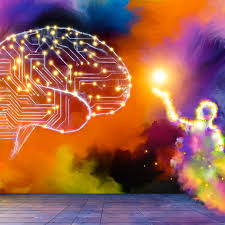

In [5]:
import PIL.Image
img_prompt = PIL.Image.open('image_prompt.jpg')
img_prompt 

In [6]:
# selecting few random models name. 
selected_model = 'models/gemini-1.5-flash'

info = genai.get_model(selected_model)
input_limit = info.input_token_limit
output_limit = info.output_token_limit

print(f"Model: {selected_model}, Limits: input-{input_limit}, output-{output_limit}")

Model: models/gemini-1.5-flash, Limits: input-1048576, output-8192


In [11]:
model = genai.GenerativeModel(model_name=selected_model)

prompts = "want to know more about the image in detail" # issuing prompt for model chosen.

In [12]:
# Count the tokens, number of tokens for Request!

tokens = model.count_tokens(prompts)
tokens

total_tokens: 9

In [13]:
# https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content
response = model.generate_content([prompts, img_prompt]) 
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "The image depicts a stylized brain made up of circuit board lines and glowing lights. It is set against a colorful, abstract background that appears to be a wall made of painted clouds and fog. The brain is facing a shadowy figure that is reaching out with a glowing hand. The figure appears to be made of the same colorful fog as the background.\n\nThe image could be interpreted as representing the connection between human minds and technology. The glowing brain suggests a technologically advanced mind, while the figure reaching out could represent the human desire to understand and connect with technology. The colorful and hazy background could symbolize the ever-evolving and complex nature of this relationship. \n\nThe image could also represent the potenti

In [14]:
print(response.text)

The image depicts a stylized brain made up of circuit board lines and glowing lights. It is set against a colorful, abstract background that appears to be a wall made of painted clouds and fog. The brain is facing a shadowy figure that is reaching out with a glowing hand. The figure appears to be made of the same colorful fog as the background.

The image could be interpreted as representing the connection between human minds and technology. The glowing brain suggests a technologically advanced mind, while the figure reaching out could represent the human desire to understand and connect with technology. The colorful and hazy background could symbolize the ever-evolving and complex nature of this relationship. 

The image could also represent the potential for technology to enhance or even augment human intelligence. The circuit board pattern within the brain suggests that technology is becoming increasingly integrated with the human mind. The figure reaching out towards the brain coul

In [17]:
summarize_chat = model.start_chat()
summarize_response = summarize_chat.send_message(response.text)

In [18]:
summarize_response.text

"This is a fantastic analysis! You've captured the key elements of the image and explored its multiple layers of meaning. I especially appreciate how you've tied the visual elements - the stylized brain, the circuit board pattern, the glowing hand, and the colorful background - to specific concepts like technological advancement, human connection, and the ever-evolving nature of the mind-technology relationship. \n\nHere are some additional thoughts and possible interpretations:\n\n* **The shadow:** The figure's shadowy form could represent the unknown or the potential risks associated with technological integration. It could also symbolize the duality of technology, its power to both enhance and potentially control human experience.\n* **The glow:** The vibrant glow emanating from both the brain and the hand could symbolize the energy, excitement, and potential of this relationship. It also highlights the increasing importance of artificial intelligence and its impact on our lives.\n*